### 1-d Case nonliear switching case

consider the following model
$$
\begin{align*}
\begin{cases}
x_{n+1}=x_n+\eta \sin(5\alpha_n x_n)+\sqrt{\eta} \sigma u_n, \quad \sigma=0.6\\
y_{n+1}=y_n+\eta 2 x_n +\sqrt{\eta} \sigma_1 v_n, \quad \sigma_1=0.2
\end{cases}
\end{align*}
$$

we let the step size $\eta=0.04$ and inital value $x_0=y_0=0$

Change the Markov Chain.

In [1]:
import D1_loader
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

In [2]:
PATH_TRAIN='../Temp/Datav2/1DTrain4.pklz'
PATH_NEW='../Temp/Datav2/1DNew4.pklz'
dimX=1; N=100; n0=10; eta=0.04

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=D1_loader.load_data_wrapper(PATH_TRAIN)
datas,labels,x_new=D1_loader.load_new_data(PATH_NEW)
# Calculate MSE Error
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),1)
len(training_data)

16956

In [3]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([10,32,16,8,8,1])

In [10]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, 100, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, 100, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr6, tcRel_constlr6, ecMSE_constlr6, ecRel_constlr6, w_constlr6, b_constlr6, constlr6\
=net.SGD_Constlr(training_data, 100, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.8269167786956597
The eta of Epoch 1 is 0.001
Epoch 1: 0.5748210885970979
The eta of Epoch 2 is 0.001
Epoch 2: 0.44041723510054603
The eta of Epoch 3 is 0.001
Epoch 3: 0.39223034013484
The eta of Epoch 4 is 0.001
Epoch 4: 0.371568793147358
The eta of Epoch 5 is 0.001
Epoch 5: 0.36283110413416364
The eta of Epoch 6 is 0.001
Epoch 6: 0.3576901006828659
The eta of Epoch 7 is 0.001
Epoch 7: 0.3533965032245737
The eta of Epoch 8 is 0.001
Epoch 8: 0.3502752544494893
The eta of Epoch 9 is 0.001
Epoch 9: 0.34754919637677384
The eta of Epoch 10 is 0.001
Epoch 10: 0.3451988202336905
The eta of Epoch 11 is 0.001
Epoch 11: 0.3430559255748007
The eta of Epoch 12 is 0.001
Epoch 12: 0.34120621873778456
The eta of Epoch 13 is 0.001
Epoch 13: 0.33932719440632064
The eta of Epoch 14 is 0.001
Epoch 14: 0.3376533558022742
The eta of Epoch 15 is 0.001
Epoch 15: 0.3360685164825269
The eta

In [11]:
tcMSE_EpochAdalr1,tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data,  100, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  100, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr6, tcRel_EpochAdalr6, ecMSE_EpochAdalr6, ecRel_EpochAdalr6, w_EpochAdalr6, b_EpochAdalr6, EpochAdalr6\
=net.SGD_EpochAdalr(training_data, 100, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0011921362262245097
Epoch 0: 0.8253266450118146
The eta of Epoch 1 is 0.00138875498919346
Epoch 1: 0.5366101117008454
The eta of Epoch 2 is 0.0014318601288744702
Epoch 2: 0.4078129663944899
The eta of Epoch 3 is 0.0014444598928729005
Epoch 3: 0.3718719079398066
The eta of Epoch 4 is 0.0014519255912274383
Epoch 4: 0.36033814779223167
The eta of Epoch 5 is 0.0014570975722918121
Epoch 5: 0.35398022888553493
The eta of Epoch 6 is 0.0014610016014645517
Epoch 6: 0.34932686112117844
The eta of Epoch 7 is 0.0014649829061095681
Epoch 7: 0.34569822024411684
The eta of Epoch 8 is 0.00146861412344041
Epoch 8: 0.34250102764284795
The eta of Epoch 9 is 0.001471818985877709
Epoch 9: 0.33979339786581575
The eta of Epoch 10 is 0.001474647067920371
Epoch 10: 0.33718561985173034
The eta of Epoch 11 is 0.0014773801790424416
Epoch 11: 0.3350920824989723
The eta of Epoch 12 is 0.001479969126491263
Epoch 12:

In [27]:
# test_pred3=net.predict(test_data_data, w_EpochAdalr, b_EpochAdalr, label=False)
# test_pred3=np.array(test_pred3) 
# test_pred3=test_pred3.reshape(len(test_pred3),3)
# for k in range(len(test_pred3)):
#     test_pred3[k,:]=test_pred3[k,:]*label_std+label_mean
# mse_EpochAdalr=mean_squared_error(test_pred3,test_data_label)
# print("MSE errof of EpochAda lr is:{0}".format(mse_EpochAdalr))

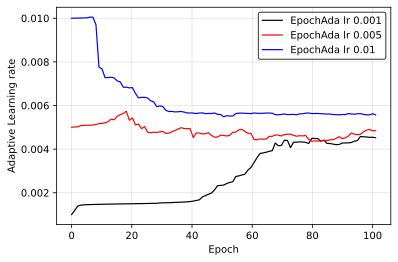

In [25]:
epochs=np.linspace(0,101,101)
plt.plot(epochs,EpochAdalr1,'k', epochs,EpochAdalr5, 'r',epochs, EpochAdalr6,'b',linewidth=1.2)
plt.grid(alpha=0.35)
plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
plt.xlabel("Epoch")
plt.ylabel("Adaptive Learning rate")
plt.savefig("../Temp/Imagesv2/1D_lr4.pdf", dpi=600,bbox_inches = 'tight')

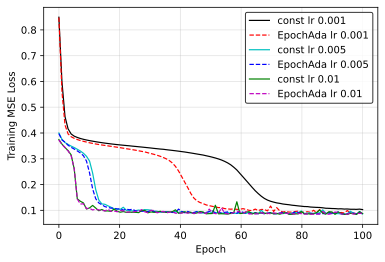

In [28]:
Epochs=np.linspace(0,100,100)
plt.plot(Epochs, tcMSE_constlr1, 'k', Epochs, tcMSE_EpochAdalr1,"r--", Epochs, tcMSE_constlr5,'c',\
         Epochs,tcMSE_EpochAdalr5,'b--',Epochs, tcMSE_constlr6,'g',Epochs,tcMSE_EpochAdalr6,'m--',linewidth=1.2)
plt.grid(alpha=0.35)
plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
plt.xlabel("Epoch")
plt.ylabel("Training MSE Loss")
plt.savefig("../Temp/Imagesv2/1D_loss4.pdf", dpi=600,bbox_inches = 'tight')

Text(0, 0.5, 'Training Relative Error')

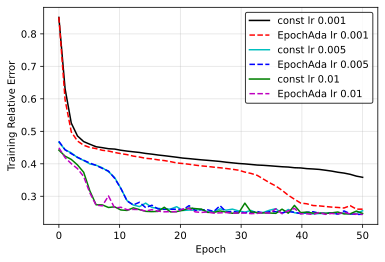

In [9]:
# Epochs=np.linspace(0,50,50)
# plt.plot(Epochs, tcRel_constlr1, 'k', Epochs,tcRel_EpochAdalr1,"r--",Epochs, tcRel_constlr5,'c',\
#          Epochs,tcRel_EpochAdalr5,'b--',Epochs, tcRel_constlr6,'g',Epochs,tcRel_EpochAdalr6,'m--')
# plt.grid(alpha=0.35)
# plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
# plt.xlabel("Epoch")
# plt.ylabel("Training Relative Error")
#plt.savefig("../Temp/Imagesv1/1D_loss4.pdf", dpi=600,bbox_inches = 'tight')

In [18]:
# tc_timeBasedlr,ec_timeBasedlr, w_timeBasedlr, b_timeBasedlr,timeBasedlr\
# =net.SGD_TimeBasedlr(training_data, 100, 128, 0.005, 0.001, evaluation_data=validation_data)
# tc_stepBasedlr, ec_stepBasedlr,w_stepBasedlr, b_stepBasedlr,stepBasedlr\
# =net.SGD_StepBasedlr(training_data, 100, 128, 0.005, 0.5, 10,evaluation_data=validation_data)
# tc_expBasedlr, ec_expBasedlr,w_expBasedlr,b_expBasedlr,expBasedlr\
# =net.SGD_ExpBasedlr(training_data, 100, 128, 0.005, 0.0001, evaluation_data=validation_data)

------------------------------
Time based learning rate begin.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.9656068924688183
The eta of Epoch 1 is 0.0009990009990009992
Epoch 1: 0.8863954047765057
The eta of Epoch 2 is 0.0009970069850309374
Epoch 2: 0.8224584961813497
The eta of Epoch 3 is 0.0009940249103000374
Epoch 3: 0.7800418467439131
The eta of Epoch 4 is 0.0009900646516932644
Epoch 4: 0.7495805447290506
The eta of Epoch 5 is 0.0009851389569087209
Epoch 5: 0.7248750297080372
The eta of Epoch 6 is 0.000979263376648828
Epoch 6: 0.7022586742763335
The eta of Epoch 7 is 0.0009724561833652712
Epoch 7: 0.6789851711742603
The eta of Epoch 8 is 0.0009647382771480865
Epoch 8: 0.6532373395948485
The eta of Epoch 9 is 0.000956133079433188
Epoch 9: 0.6235038723521077
The eta of Epoch 10 is 0.0009466664152803841
Epoch 10: 0.5896294200473391
The eta of Epoch 11 is 0.0009363663850448904
Epoch 11: 0.5540086231073525
The eta of Epoch 12 is 0.0009252632263289431
Epoch 12: 0.52125599

In [8]:
# plt.plot(epochs, tc_constlr1,epochs,tc_constlr2,epochs,tc_constlr3,epochs,tc_EpochAdalr,\
#          epochs, tc_timeBasedlr,epochs,tc_stepBasedlr,epochs, tc_expBasedlr)
# plt.legend(["Const lr =0.001","Const lr =0.005","Const lr =0.01","EpochAda lr","TimeBased lr","StepBased lr","ExpBased lr"],edgecolor='black')
# plt.xlabel("Epoch")
# plt.ylabel("Train cost")
#plt.savefig("../SmallScale/Images/MWSmall_tc1.pdf", dpi=600)

### Print our relative error on test data and new data

In [14]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

In [15]:
testPred_constlr1=net.predict(test_data_data, w_constlr1, b_constlr1, label=False)
testPred_constlr5=net.predict(test_data_data, w_constlr5, b_constlr5, label=False)
testPred_constlr6=net.predict(test_data_data, w_constlr6, b_constlr6, label=False)
testPred_EpochAdalr1=net.predict(test_data_data, w_EpochAdalr1, b_EpochAdalr1, label=False)
testPred_EpochAdalr5=net.predict(test_data_data, w_EpochAdalr5, b_EpochAdalr5, label=False)
testPred_EpochAdalr6=net.predict(test_data_data, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(testPred_constlr1, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_constlr5, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_constlr6, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr1, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr5, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr6, test_data_label, label_mean, label_std, dimX)

MSE and RelErr are: 0.08532860831245768,0.16256120522370357
MSE and RelErr are: 0.07075371431603734,0.14899626437392427
MSE and RelErr are: 0.07257668577894959,0.14921434441763082
MSE and RelErr are: 0.07312566954044773,0.15191090076190616
MSE and RelErr are: 0.06979980814412165,0.14814669161616606
MSE and RelErr are: 0.07404083117928062,0.14775724661284853


In [16]:
newPred_constlr1=net.predict(datas, w_constlr1, b_constlr1, label=False)
newPred_constlr5=net.predict(datas, w_constlr5, b_constlr5, label=False)
newPred_constlr6=net.predict(datas, w_constlr6, b_constlr6, label=False)
newPred_EpochAdalr1=net.predict(datas, w_EpochAdalr1, b_EpochAdalr1, label=False)
newPred_EpochAdalr5=net.predict(datas, w_EpochAdalr5, b_EpochAdalr5, label=False)
newPred_EpochAdalr6=net.predict(datas, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(newPred_constlr1, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_constlr5, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_constlr6, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr1, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr5, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr6, x_new[n0-1:], label_mean, label_std, dimX)

MSE and RelErr are: 0.056918394177660626,0.18401418805118874
MSE and RelErr are: 0.04284632028135015,0.1644569033379637
MSE and RelErr are: 0.05840760872208416,0.1944419663175904
MSE and RelErr are: 0.04872912779746992,0.1758617084616701
MSE and RelErr are: 0.046755776917914826,0.17153741670681158
MSE and RelErr are: 0.051636165134078295,0.1795789553669365


### Repeat 256 times of Monte Carlo

In [31]:
import D1_generator
N_sample=256
TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    datas1, labels1, x_new1=D1_generator.generate_new_data(data_mean, data_std)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [32]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr6=net.predict(TotalDatas, w_constlr6, b_constlr6, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr6=net.predict(TotalDatas, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr6, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr6, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 0.08547872939640659,0.17332989534969773
MSE and RelErr are: 0.07355656221228536,0.1617059805057892
MSE and RelErr are: 0.07286678667240704,0.15872361792963413
MSE and RelErr are: 0.07400912602580119,0.16243788027870723
MSE and RelErr are: 0.07158541713793072,0.1594096239195434
MSE and RelErr are: 0.07578740900061047,0.15908303148636488


### plot the sample path

In [29]:
x0=0
df_pred1=net.predict(datas,w_constlr5, b_constlr5,label=False)
df_pred1=np.array(df_pred1)
df_pred1=df_pred1.reshape(len(df_pred1),dimX)
for k in range(N-n0+2):
    df_pred1[k,:]=df_pred1[k,:]*label_std+label_mean
df_new1=[x0 for k in range(n0-1)]
df_new1=np.array(df_new1)
df_new1=df_new1.reshape(n0-1,dimX)
df_new1=np.vstack((df_new1,df_pred1))

In [18]:
df_pred3=net.predict(datas,w_EpochAdalr5, b_EpochAdalr5,label=False)
df_pred3=np.array(df_pred3)
df_pred3=df_pred3.reshape(len(df_pred3),dimX)
for k in range(N-n0+2):
    df_pred3[k,:]=df_pred3[k,:]*label_std+label_mean
df_new3=[x0 for k in range(n0-1)]
df_new3=np.array(df_new3)
df_new3=df_new3.reshape(n0-1,dimX)
df_new3=np.vstack((df_new3,df_pred3))

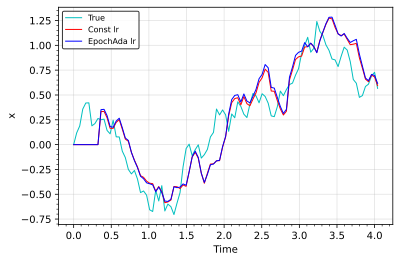

In [27]:
axis=np.linspace(0,eta*(N+1),N+1)
fig, ax=plt.subplots()
ax.plot(axis,x_new[:,0],'c',axis,df_new1[:,0],'r',axis, df_new3[:,0],'b',linewidth=1.0)
ax.minorticks_on()
ax.grid(alpha=0.35)
ax.set(xlabel="Time", ylabel="x")
ax.legend(["True","Const lr","EpochAda lr"],prop={'size':8}, edgecolor="black")
plt.savefig("../Temp/Imagesv2/1D_path5.pdf",dpi=600, bbox_inches = 'tight')

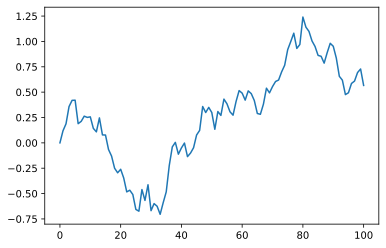

In [20]:
plt.plot(x_new)
#plt.savefig("../SmallScale/Images/MWSmall_path1.pdf",dpi=600, bbox_inches="tight")